In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
digit_dataset = keras.datasets.mnist

In [ ]:
(train_img,train_labels),(test_img,test_labels) = digit_dataset.load_data()

In [ ]:
train_img = train_img/255.0
test_img = test_img/255.0

In [ ]:
train_img[0].shape

(28, 28)

In [ ]:
train_img = train_img.reshape(len(train_img),28,28,1)

In [ ]:
test_img = test_img.reshape(len(test_img),28,28,1)

In [ ]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Conv2D(
          filters = hp.Int('Conv_1_filter',min_value = 32,max_value=128,step=16),
          kernel_size=hp.Choice('Conv_1_kernel',values=[3,5]),
          activation='relu',input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
          filters = hp.Int('Conv_2_filter',min_value = 32,max_value=64,step=16),
          kernel_size=hp.Choice('Conv_2_kernel',values=[3,5]),
          activation='relu'
      ),
      keras.layers.Flatten(),
      keras.layers.Dense(
          units = hp.Int('dense_1_units',min_value = 32,max_value=128,step=16),
          activation='relu'
      ),
      keras.layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name='MnistDigit')

Reloading Tuner from output/MnistDigit/tuner0.json


In [ ]:
tuner_search.search(train_img,train_labels,epochs=3,validation_split=0.1)

In [ ]:
model = tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        51232     
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 112)               1734768   
                                                                 
 dense_1 (Dense)             (None, 10)                1130      
                                                                 
Total params: 1787770 (6.82 MB)
Trainable params: 1787770 (6.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_img,train_labels,batch_size = 10,
          epochs = 5,
          verbose = 1,
          validation_data =(test_img, test_labels),)

Epoch 1/5
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 2/5
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0377 - val_accuracy: 0.9908
Epoch 3/5
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0480 - val_accuracy: 0.9904
Epoch 4/5
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0655 - val_accuracy: 0.9864
Epoch 5/5
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0741 - val_accuracy: 0.9881


In [ ]:
test_loss,test_acc = model.evaluate(test_img,test_labels)
print("Accuracy on testing data is ",round(test_acc*100,2),"%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9881
Accuracy on testing data is  98.81 %


In [ ]:
predictions = model.predict(test_img)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predicted_labels = predictions.argmax(axis=1)

In [ ]:
for i in range(0,5):
  print(f"Actual Label : {test_labels[i]},Predicted Label: {predicted_labels[i]}")

Actual Label : 7,Predicted Label: 7
Actual Label : 2,Predicted Label: 2
Actual Label : 1,Predicted Label: 1
Actual Label : 0,Predicted Label: 0
Actual Label : 4,Predicted Label: 4


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i].reshape(28,28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label = predictions_array.argmax()
  color = 'blue' if predicted_label == true_label else 'red'
  plt.xlabel(f"Predicted: {predicted_label}({100*tf.reduce_max(predictions_array):2f}%),Actual: {true_label}",color=color)

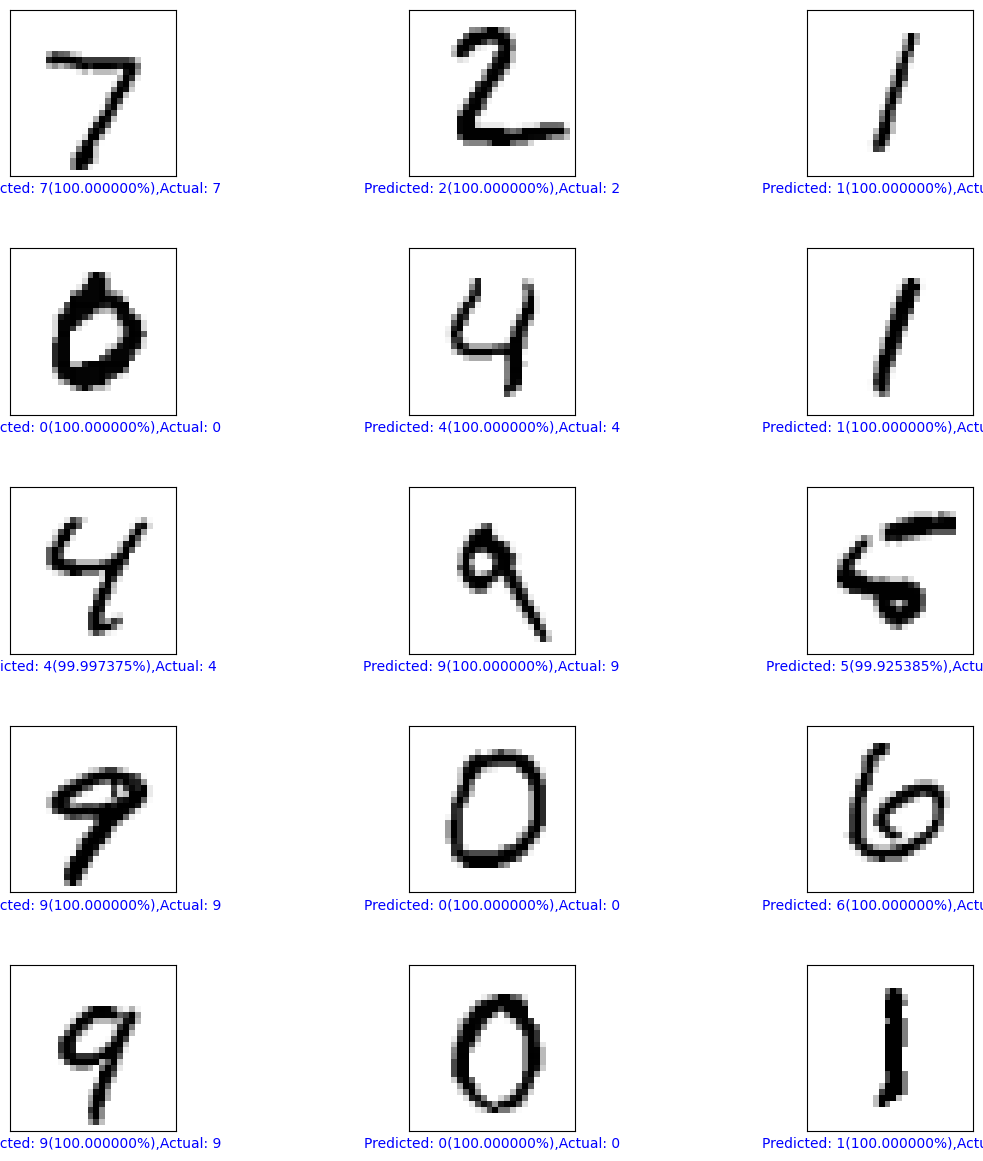

In [ ]:
num_rows=5
num_cols=3
num_images = num_rows * num_cols
plt.figure(figsize=(15,15))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_img)
plt.show()